# 00 - Project Setup and Installation

This notebook is used to:
1. Verify the Python environment
2. Install required packages
3. Create necessary directories
4. Test that everything is working correctly

**Run this notebook first before proceeding to the analysis notebooks!**

## Step 1: Verify Python Version

We need Python 3.8 or higher for this project.

In [2]:
import sys

print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")

# Check version
if sys.version_info >= (3, 8):
    print("Python version is compatible!")
else:
    print("Please upgrade to Python 3.8 or higher")

Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Python executable: c:\Users\aruni\anaconda3\python.exe
Python version is compatible!


## Step 2: Install Required Packages

**Note:** It's recommended to run this in a virtual environment.

### Option 1: Install from requirements.txt (recommended)

Open a terminal in the project root directory and run:
```bash
pip install -r requirements.txt
```

### Option 2: Install directly from this notebook

Uncomment and run the cell below:

In [2]:
# !pip install -r ../requirements.txt

## Step 3: Verify Package Installation

Let's check that all required packages are installed correctly.

In [4]:
import importlib
import sys

required_packages = [
    'numpy',
    'pandas',
    'sklearn',
    'xgboost',
    'shap',
    'matplotlib',
    'seaborn',
    'imblearn',
    'fuzzywuzzy',
    'joblib',
    'scipy',
    'tqdm'
]

print("Checking installed packages...\n")
all_installed = True

for package in required_packages:
    try:
        module = importlib.import_module(package)
        version = getattr(module, '__version__', 'unknown')
        print(f"{package:20s} {version}")
    except ImportError:
        print(f"{package:20s} NOT INSTALLED")
        all_installed = False

print("\n" + "="*50)
if all_installed:
    print("All required packages are installed!")
else:
    print("Some packages are missing. Please install them using requirements.txt")

Checking installed packages...

numpy                1.26.3
pandas               2.2.0
sklearn              1.7.2
xgboost              3.1.2
shap                 0.49.1
matplotlib           3.8.2
seaborn              0.13.2
imblearn             0.14.0
fuzzywuzzy           0.18.0
joblib               1.5.2
scipy                1.12.0
tqdm                 4.66.2

All required packages are installed!


## Step 4: Verify Directory Structure

This checks that all necessary directories exist.

In [10]:
import os
from pathlib import Path

# Get project root (parent of notebooks directory)
project_root = Path.cwd().parent
print(f"Project root: {project_root}\n")

# Required directories
required_dirs = [
    'data/raw',
    'data/processed',
    'models',
    'figures',
    'reports',
    'notebooks',
    'src'
]

print("Checking directory structure...\n")
all_exist = True

for dir_path in required_dirs:
    full_path = project_root / dir_path
    if full_path.exists():
        print(f"{dir_path}")
    else:
        print(f"{dir_path} - MISSING")
        all_exist = False
        # Create it
        full_path.mkdir(parents=True, exist_ok=True)
        print(f"   → Created directory: {dir_path}")

print("\n" + "="*50)
if all_exist:
    print("All directories exist!")
else:
    print("Missing directories have been created!")

Project root: c:\Users\aruni\FeatureBeats

Checking directory structure...

data/raw
data/processed
models
figures
reports
notebooks
src

All directories exist!


## Step 5: Test Basic Functionality



In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Testing basic functionality...\n")

# Create dummy data
np.random.seed(42)
X = np.random.randn(100, 5)
y = np.random.randint(0, 2, 100)

# Test train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train/test split works - Train size: {len(X_train)}, Test size: {len(X_test)}")

# Test model training
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model training works - Test accuracy: {accuracy:.2f}")

# Test plotting
plt.figure(figsize=(6, 4))
plt.plot([1, 2, 3], [1, 4, 9], marker='o')
plt.title('Test Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.close()  # Don't display, just test
print("Plotting works")

# Test DataFrame creation
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
df['target'] = y
print(f"Pandas works - DataFrame shape: {df.shape}")

print("\n" + "="*50)
print("All basic functionality tests passed!")

Testing basic functionality...

Train/test split works - Train size: 80, Test size: 20
Model training works - Test accuracy: 0.35
Plotting works
Pandas works - DataFrame shape: (100, 6)

All basic functionality tests passed!


## Step 6: Set up Plotting Style

Configure matplotlib and seaborn for visualizations.

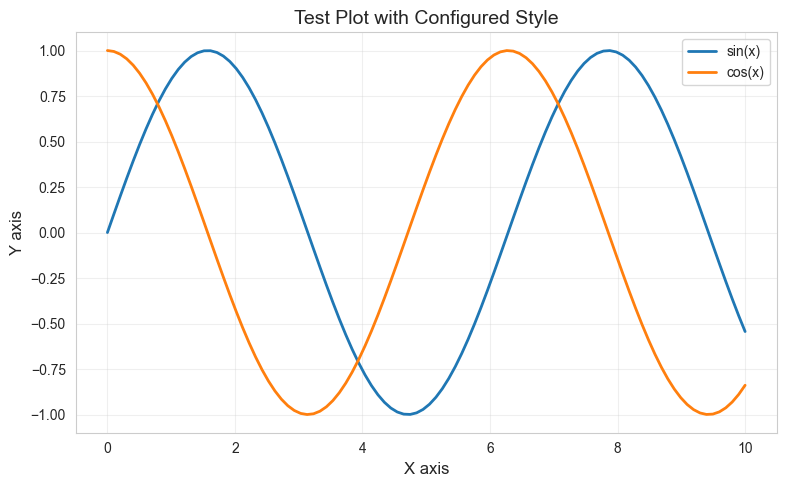

Plotting style configured!


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Test the style
fig, ax = plt.subplots(figsize=(8, 5))
x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x), label='sin(x)', linewidth=2)
ax.plot(x, np.cos(x), label='cos(x)', linewidth=2)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Test Plot with Configured Style')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Plotting style configured!")

## Step 7: Data Download Instructions

### Required Datasets

Download two datasets from Kaggle and place them in the `data/raw/` directory:

1. **Spotify Tracks Dataset (1921 - 2020)**
   - Search for https://www.kaggle.com/datasets/ektanegi/spotifydata-19212020
   - Download the zip folder, unzip it and rename it to `tracks.csv`
   - Place in: `data/raw/tracks.csv`
   - It should contain audio features for thousands of songs

2. **Spotify Top 100 Dataset 2010 - 2023** (or Billboard Hot 100)
   - Search for https://www.kaggle.com/datasets/josephinelsy/spotify-top-hit-playlist-2010-2022 on Kaggle
   - Download the CSV file
   - Place in: `data/raw/top100_tracks.csv`
   - Should contain chart-topping songs

### Alternative Dataset Sources

If the exact datasets are not available:
- **Spotify Million Song Dataset**
- **Billboard Charts Dataset**
- Any dataset with Spotify audio features and a way to identify hits

**The datasets must have:**
- Track name
- Artist name
- Audio features (danceability, energy, valence, etc.)
- Year/date information
- (Optional) Spotify track ID for better matching

## Step 8: Verify Data Files (Optional)

Run this cell after the datasets have been downloaded to verify they're in the right place.

In [9]:
from pathlib import Path

project_root = Path.cwd().parent
data_dir = project_root / 'data' / 'raw'

print("Checking for data files...\n")

# Check for tracks dataset
tracks_file = data_dir / 'tracks.csv'
if tracks_file.exists():
    size_mb = tracks_file.stat().st_size / (1024 * 1024)
    print(f"tracks.csv found ({size_mb:.2f} MB)")
    
    # Try to read first few rows
    try:
        df_preview = pd.read_csv(tracks_file, nrows=5)
        print(f"   Columns: {', '.join(df_preview.columns[:10])}...")
        print(f"   Shape preview: ({df_preview.shape[0]} rows shown, ? total)")
    except Exception as e:
        print(f"   Could not read file: {e}")
else:
    print("tracks.csv not found")
    print(f"   Expected location: {tracks_file}")

print()

# Check for top 100 dataset
top100_file = data_dir / 'top100_tracks.csv'
if top100_file.exists():
    size_mb = top100_file.stat().st_size / (1024 * 1024)
    print(f"top100_tracks.csv found ({size_mb:.2f} MB)")
    
    # Try to read first few rows
    try:
        df_preview = pd.read_csv(top100_file, nrows=5)
        print(f"   Columns: {', '.join(df_preview.columns)}")
        print(f"   Shape preview: ({df_preview.shape[0]} rows shown, ? total)")
    except Exception as e:
        print(f"   Could not read file: {e}")
else:
    print("top100_tracks.csv not found")
    print(f"   Expected location: {top100_file}")

print("\n" + "="*50)
print("If files are missing, please download them as per the instructions above.")

Checking for data files...

tracks.csv found (19.29 MB)
   Columns: Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy...
   Shape preview: (5 rows shown, ? total)

top100_tracks.csv found (0.64 MB)
   Columns: playlist_url, year, track_id, track_name, track_popularity, album, artist_id, artist_name, artist_genres, artist_popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature
   Shape preview: (5 rows shown, ? total)

If files are missing, please download them as per the instructions above.


## Setup Complete!

If all checks passed, then move on to next notebooks

### Troubleshooting

If encountered by any issues:

1. **Package installation failures:**
   - Try updating pip: `pip install --upgrade pip`
   - Install packages one by one to identify the problem
   - Check Python version compatibility

2. **Import errors:**
   - Restart the Jupyter kernel
   - Check that you're using the correct virtual environment
   - Verify package installation with `pip list`

3. **Data file issues:**
   - Ensure files are in CSV format
   - Check file permissions
   - Verify file paths are correct

### Next Steps

1. Download the required datasets (see Step 7)
2. Run the verification in Step 8
3. Proceed to notebook 01 for data analysis